In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# !wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz -O /Users/amirm/vl_data/oxford/images.tar.gz

In [3]:
# # Create 
# !mkdir /Users/amirm/vl_data/oxford/images
# !wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz -O /Users/amirm/vl_data/oxford/images.tar.gz
# !tar xvf /Users/amirm/vl_data/oxford/images.tar.gz -C /Users/amirm/vl_data/oxford/images

In [4]:
import fastdup

JPY_PARENT_PID=4642


In [5]:
images_dir = '/Users/amirm/vl_data/oxford/images/'
work_dir = '/Users/amirm/vl_workdir/oxford/images_unlabeled'
labeled_work_dir = '/Users/amirm/vl_workdir/oxford/images_labeled'

In [6]:
fd = fastdup.create(work_dir=work_dir, input_dir=images_dir)
fd.run(ccthreshold=0.9, threshold=0.8,)# overwrite=True)

/Users/amirm/anaconda3/envs/v1_bugbash/lib/python3.9/site-packages/fastdup/fastdup_controller.py:281: UserWarning: Fastdup was already applied, use overwrite=True to re-run
  warnings.warn('Fastdup was already applied, use overwrite=True to re-run')


In [4]:
aa = fd._fetch_df('atrain_features.bad.csv')

In [5]:
aa

,index,filename,error_code
0,136,Abyssinian_34.jpg,ERROR_ZERO_SIZE_FILE
1,1042,Egyptian_Mau_139.jpg,ERROR_ZERO_SIZE_FILE
2,1049,Egyptian_Mau_145.jpg,ERROR_ZERO_SIZE_FILE
3,1070,Egyptian_Mau_167.jpg,ERROR_ZERO_SIZE_FILE
4,1079,Egyptian_Mau_177.jpg,ERROR_ZERO_SIZE_FILE
5,1095,Egyptian_Mau_191.jpg,ERROR_ZERO_SIZE_FILE


In [ ]:
fd.invalid_instances()

In [ ]:
from pathlib import Path
import fastdup.fastup_constants as FD
from fastdup import create_outliers_gallery, create_duplicates_gallery, create_components_gallery, \
    create_similarity_gallery, find_top_components


In [ ]:
fd.vis.component_gallery(sort_by='comp_size', max_width=700)

In [ ]:
fd.vis.component_gallery(sort_by='distance', max_width=700, min_items=2, ascending=False)

In [ ]:
top_components

In [ ]:
# fd.vis.component_gallery(label_col='img_filename', max_width=1000, min_items=3)

In [ ]:
fd.vis.outliers_gallery()

In [ ]:
fd.outliers().sort_values(by=['distance']).head(3)

In [ ]:
fd.vis.similarity_gallery()

In [ ]:
# fd.vis.duplicates_gallery(label_col='fastdup_id')

In [ ]:
df = fd.annotations(valid_only=False)
df

Now, let's take 

In [ ]:
cc_df, _ = fd.connected_components()

In [ ]:
cc_df[cc_df.mean_distance > 0.99].sort_values(by=['count'], ascending=False).head(3)

In [ ]:
agg_dict = {'img_filename': list, 'mean_distance': max}
duplicate_df = cc_df.groupby('component_id').agg(agg_dict).sort_values(by=['mean_distance'], ascending=False)
duplicate_df[duplicate_df.img_filename.str.len() > 1].head(3)
# duplicate_df.head(3)

In [ ]:
duplicate_df.img_filename.tolist()

# Visualize blurry, dark and bright images

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 629.34it/s]

Stored blur visual view in  /Users/amirm/vl_workdir/oxford/images_unlabeled/galleries/stats_20230227124516/blur.html



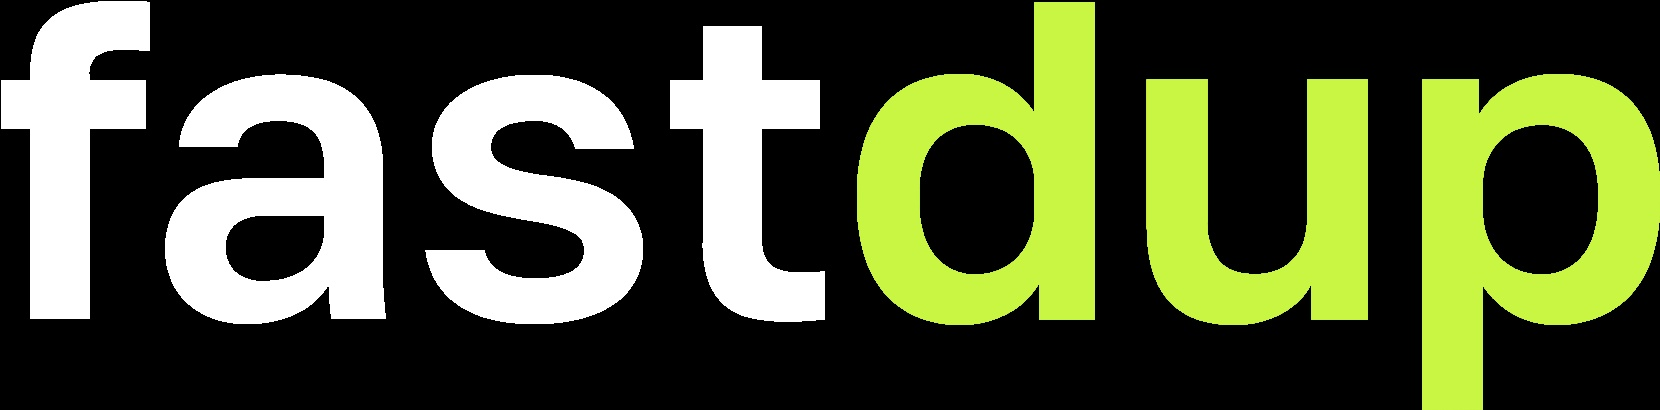
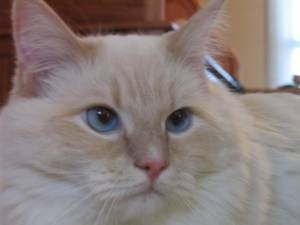
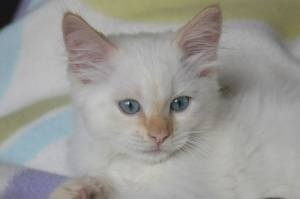
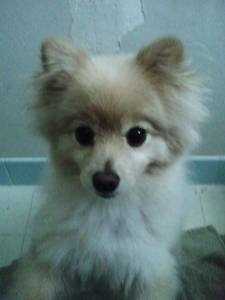
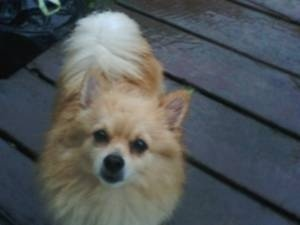
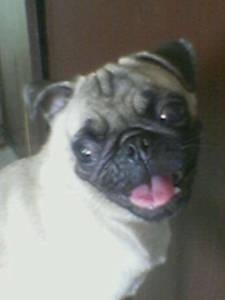
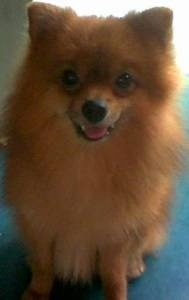
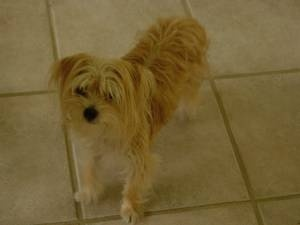
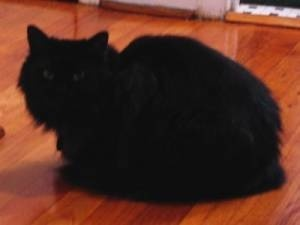
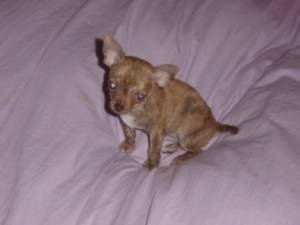
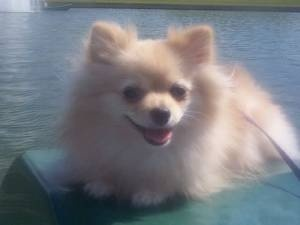
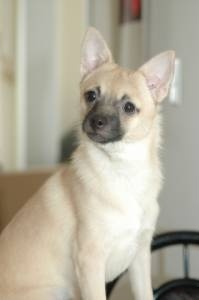
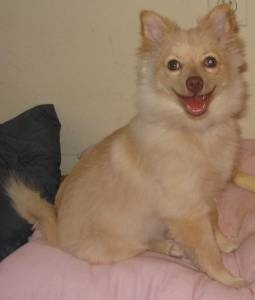
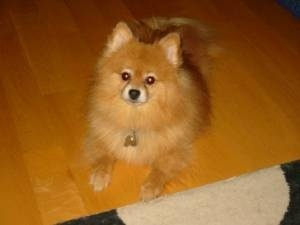
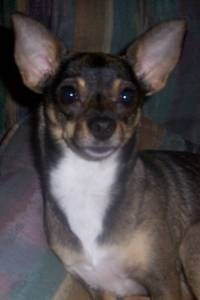
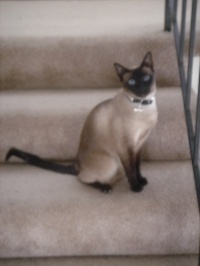
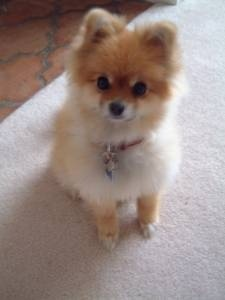
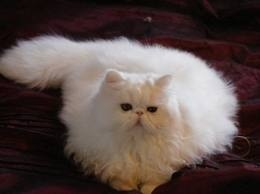
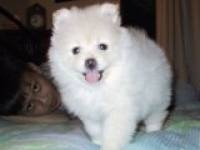
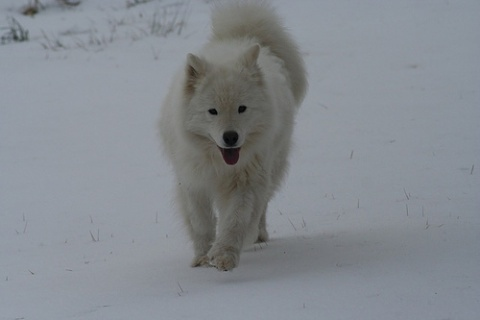
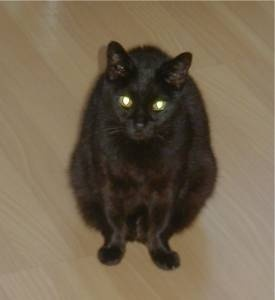
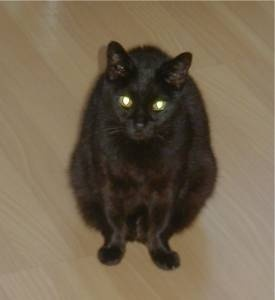
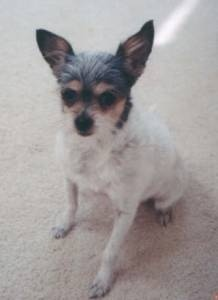
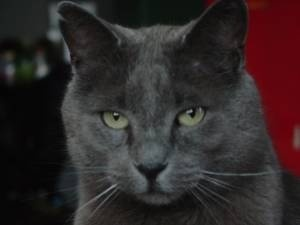
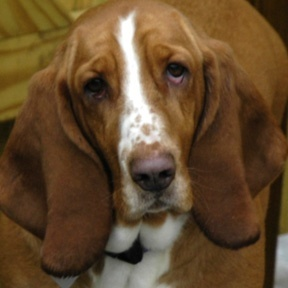
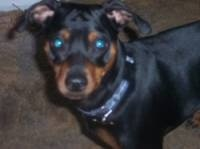

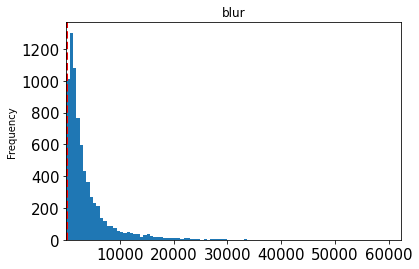

In [7]:
# fd.vis.stats_gallery(metric='blur')

In [12]:
# fd.vis.stats_gallery(metric='dark')

TypeError: stats_gallery() got an unexpected keyword argument 'max_width'

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 350.07it/s]


Stored mean visual view in  /Users/amirm/vl_workdir/oxford/images_unlabeled/galleries/stats_20230227124553/mean.html



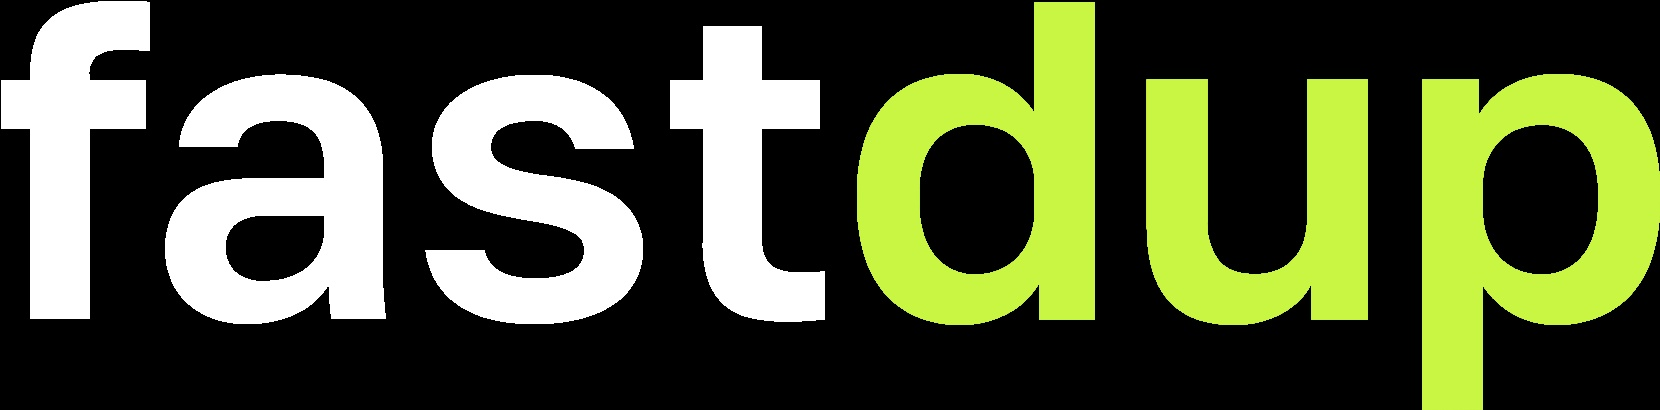
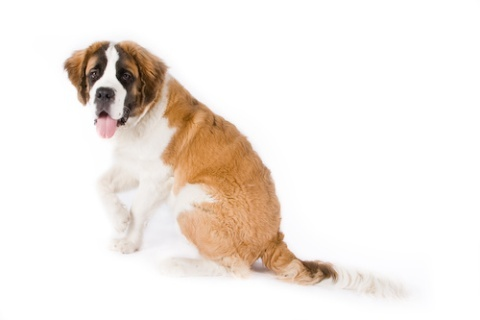
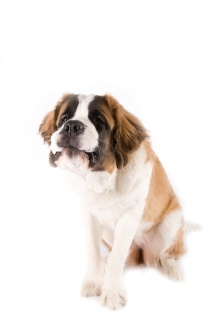
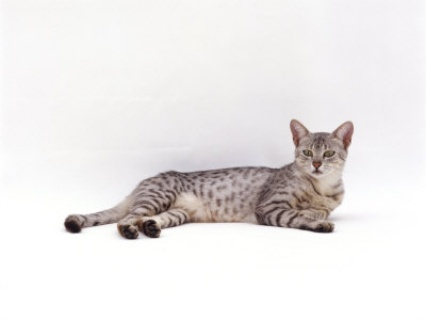
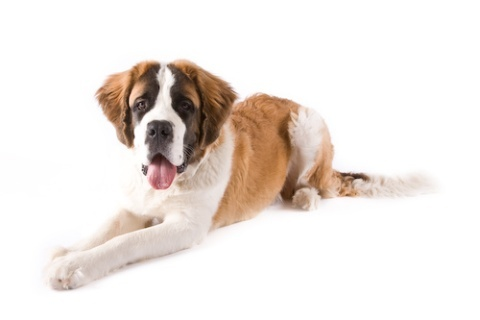
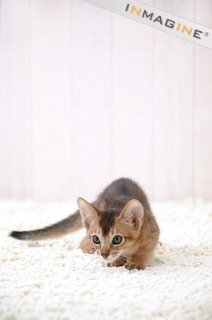
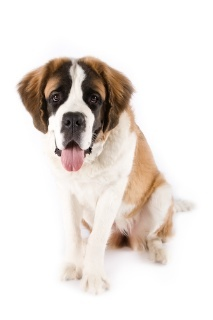
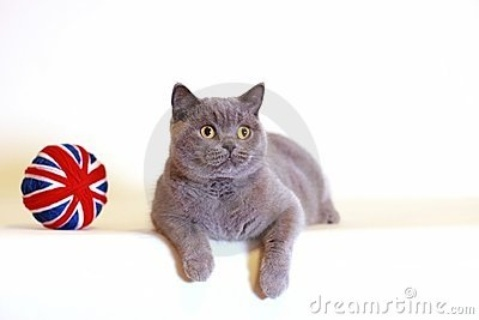
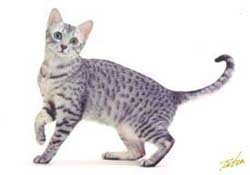
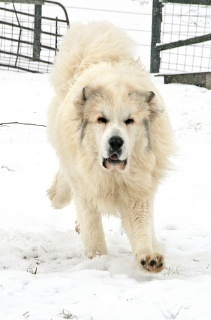
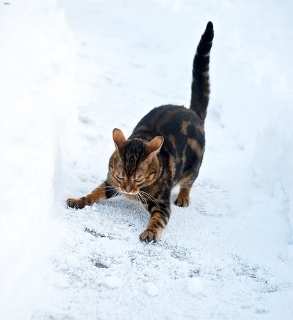
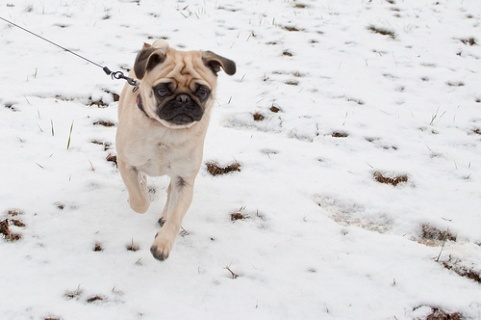
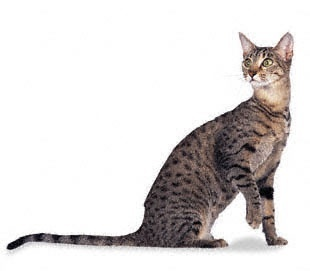
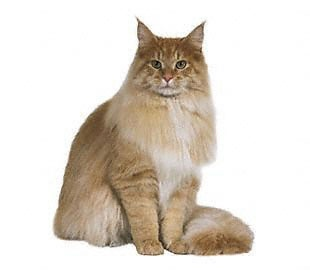
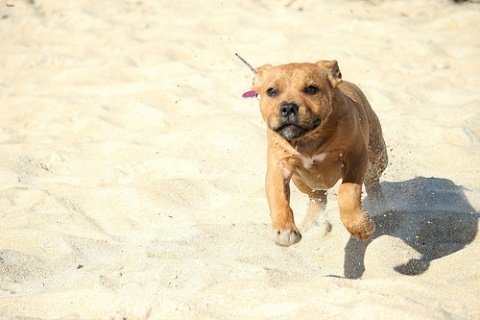
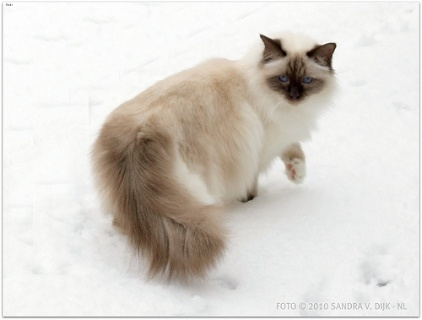
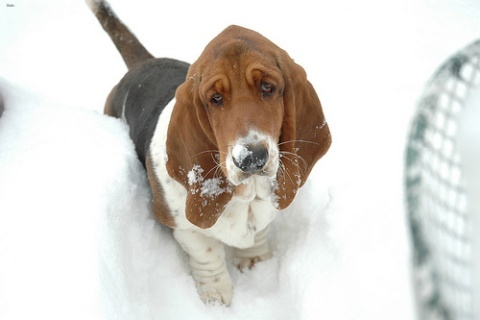
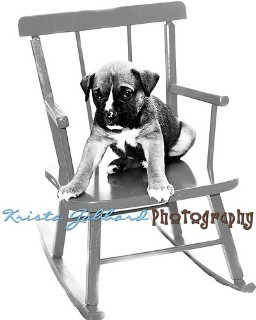
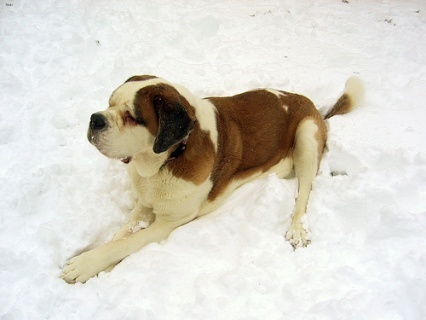
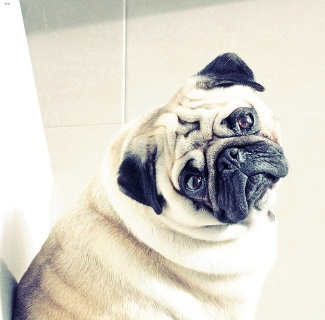
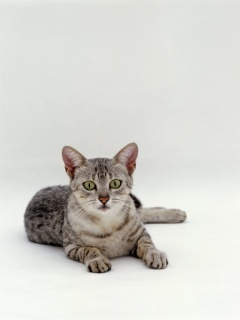
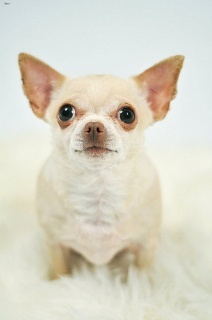
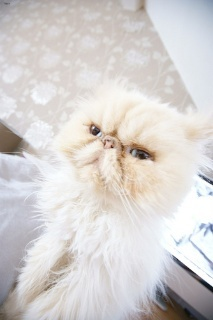
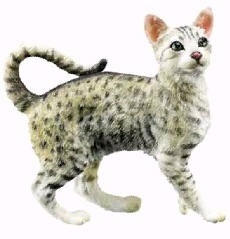
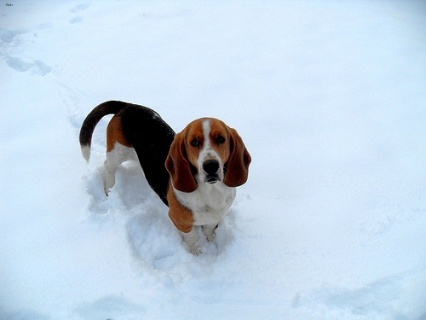
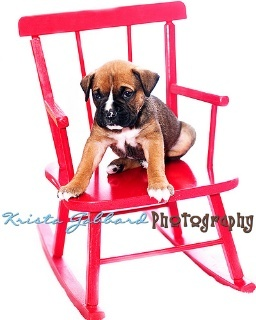

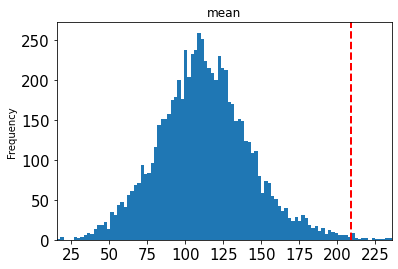

In [11]:
# fd.vis.stats_gallery(metric='bright')

In [12]:
cols = fd.img_stats().columns

In [13]:
cols

Index(['fastdup_id', 'img_w', 'img_h', 'unique', 'blur', 'mean', 'min', 'max',
       'stdv', 'file_size', 'contrast', 'img_filename', 'error_code',
       'is_valid'],
      dtype='object')

In [14]:
cols2 = ['fastdup_id', 'img_filename', 'img_w', 'img_h', 'unique', 'blur', 'mean', 'min', 'max',
       'stdv', 'file_size', 'contrast', 'error_code',
       'is_valid']

In [15]:
fd.img_stats()[cols2].head()

,fastdup_id,img_filename,img_w,img_h,unique,blur,mean,min,max,stdv,file_size,contrast,error_code,is_valid
0,0,Abyssinian_1.jpg,600,400,239,586.0380,69.5999,0.0,242.0,37.9883,32362,1.0,VALID,True
1,1,Abyssinian_10.jpg,375,500,248,808.7275,69.1038,0.0,249.0,52.6960,96294,1.0,VALID,True
2,2,Abyssinian_100.jpg,394,500,256,4120.0146,142.0682,0.0,255.0,84.0555,126923,1.0,VALID,True
3,3,Abyssinian_101.jpg,450,313,256,2440.4067,128.6538,0.0,255.0,78.9571,49023,1.0,VALID,True
4,4,Abyssinian_102.jpg,500,465,256,4965.8892,127.4869,0.0,255.0,57.4010,165505,1.0,VALID,True
